# The Bancor Protocol
Based on the whitepaper from: Eyal Hertzog, Guy Benartzi, Galia Benartzi, "The Bancor Protocol" March, 2018

8/22/18

Written for: [Horuspay.io](https://horuspay.io/)

By: gunnar pope

* github: https://github.com/gunnarpope
* email: gunnarpope@gmail.com


Forward: This script in intended to explore and expand upon the brilliance of the Bancor Protocol Algorithm presented by Hertzong, et al. Any critiques provided below are intended to build upon and clarify their work. -gp




### Definitions and notes on the Bancor Algorithm:

* $TOK$ is the your native Smart Token symbol, which could be HORUS for example
* $CTOK$ is the connector token that you wish to transfer, which could be EOS, BTC, or even ETH, if desired.
* [USD/TOK] the brakets indicate only the units of the variable, in this case the unit is USD/TOK
* From the whitepaper, "The price of a Smart Token is denominated in the connected token (for example, the price of BNT is denominated in ETH, its connected token"
* 'The bancor formula is built upon the idea that the smart contract maintains a ratio between the total value and the connector balance, the connector weight.'


### Smart Token Market Cap
The total market capitalization of the Smart Token, $TOK$, is the total value of the $TOK$ market, in reference of the connector token, $CTOK$. The $TOKmarketCap$ variable must be in units of [CTOK] for $CW$ to be a unitless number. Therefore, the whitepaper formula for $TOKmarketCap$ should be modified to be:

$$TOKmarketcap [CTOK]= price [CTOK/TOK]*totalTOKsupply[TOK]$$


For instance, if the total supply of EOS was 1000 EOS, than the $TOKmarketcap$ would be:

$$ TOKmarketcap =  0.00074823558[BTC/EOS] * 1000 EOS = 0.74680 BTC $$.

### Connector Weight
From the Price Formula algorithms:

$$ CW = \frac{CTOKbalance [CTOK]}{TOKmarketcap [CTOK]}$$

where:

Where, $CTOKbalance$ is the balance of the tokens in the connector account.


A few small notes: 
 * The whitepaper states that: "The CW is expressed as a percentage greater than 0% and up to 100%, and as mentioned, is initially set by the creator when a Smart Token is configured." 
 
 
 
If this were true, and $CTOKbalance$ and $TOKmarketcap$ are of the same units, than the equation for $CW$ would have to be:
$$ CW = \frac{CTOKbalance [CTOK]}{TOKmarketcap [CTOK]}*100$$



But this would scale $price$ calculation to be artificially low (I think), so it is probably ranging between $0 < CW < 1$.


### Smart Token Price

The price of the smart token is denominated (referrenced to) the connector token. For example, if EOS is the Smart token and BTC is the connector token, and 1 EOS = 0.00074823558 BTC, than the units of $price$ are:

$$ price =  0.00074823558 [BTC/EOS]$$.


In reference to this algorithm, the units of price are.
$$ price = XX.XXXX [CTOK/TOK]$$


Solve for the Smart Token's price as a function of it's connector balance, Smart Token supply and $CW$.  The $Smart Token Outstanding Supply$ is not defined in the Bancor whitepaper, but we're assuming it represents available supply of $TOK$ to the smart contract, $TOKsupply$. This $TOKsupply$ would have to be a liquid balance of $TOK$, owned by the Smart Contract administrators, to be usefully traded.


$$ price [CTOK/TOK] = \frac{CTOKBalance [CTOK]}{TOKsupply [TOK]*CW}$$

This formula implies that if there is a large outstanding supply (low demand), the token will be worth a fraction of it's marketcap price and if only a few tokens are available in supply (high demand), each token will be worth nearly the marketcap price.


#### Tokens Issued 


$$ TOKissued [TOK] = TOKsupply [TOK]*\big((1+(\frac{CTOKrecieved [CTOK]}{CTOKbalance [CTOK]})^{CW}-1\big)$$

This is the amount of Smart Tokens to payout given the current smart token supply, $TOKsupply$, the connected tokens paid, $CTOKrecieved$, and the balance of $CTOK$ tokens in the bancor account, $CTOKbalance$.


$$ CTOKissued = CTOKbalance * ((1+ \frac{TOKrecieved}{TOKsupply})^{\frac{1}{CW}}-1) $$

The effective price can be calculated as:

$$ effectivePrice  [CTOK/TOK] = \frac{CTOKexchanged [CTOK]}{TOKexchanged [TOK]}$$

The $effectivePrice$ represents the effective exchange rate of the transaction, in units of $[CTOK/TOK]$




In [1]:
# The Bancor Algorithm and testing
class smart_token:
    def __init__(self, name, supply):
        self.name = name                     #"TOK"
        self.supply = supply                 #[TOK] circulating supply
    
    def printtok(self):
        print("Token Stats:")
        print("Token: ", self.name)
        print("Supply: ", self.supply)
        
    
class connector:
    def __init__(self, tokenname, balance, connectorweight):
        self.token   = tokenname       # name="CTOK", for example
        self.balance = balance         # [CTOK] balance
        self.weight  = connectorweight #

        
    def printcon(self):
        print("Connector Stats:")
        print("Token: ", self.token)
        print("Balance: ", self.balance)
        print("CWeight: ", self.weight)

    
class BancorExchange:
    
    def __init__(self, CW):
        self.CW = CW
        self.price = 0.0
        self.effective_price = 0.0

    def printf(self):
        print("CW: ", self.CW)
        print("Price: ", self.price)
        
    def CTOKtoTOK(self, tok, ctok, CTOKreceived):
        
        # get TOK supply
        TOKsupply = tok.supply
        
        # get price
        self.price = self.getprice(tok, ctok)
        
        # get TOKmarketcap
        marketcap = self.marketcap(self.price, tok.supply)
        
        # compute TOKissued
        TOKissued = self.TOKissued(TOKsupply, ctok.balance, CTOKreceived, CW)
        
        # compute the effective price
        
        # remove TOK from TOKbalance
        tok.supply += TOKissued # the total circulating supply increases
        
        # add CTOK to CTOKbalance
        ctok.balance += CTOKreceived  # the balance of CTOK increases
        
        # calculate the effective price
        self.effective_price =   CTOKreceived/ (1.0*TOKissued)
        
        # return TOKissued and effective price
        return (TOKissued)
    
    def TOKtoCTOK(self, tok, ctok, TOKreceived):      
        
        # get price
        self.price = self.getprice(tok, ctok)
        
        # get TOKmarketcap
        marketcap = self.marketcap(self.price, tok.supply)
        
        # compute CTOKissued
        CTOKissued = self.CTOKissued(tok.supply, ctok.balance, TOKreceived, CW)
        
        # remove CTOK from CTOKbalance
        ctok.balance -= CTOKissued
        
        # remove TOK to TOKbalance
        tok.supply -= TOKreceived
        
        # calculate the effective price
        self.effective_price =   CTOKissued/ (1.0*TOKreceived)
        
        # return TOKissued and effective price
        return (CTOKissued)
        
        
    
        
        
    def updateCW(self, CTOKbalance, TOKmarketcap):
        CW = CTOKbalance / TOKmarketcap
        return (CW)
        
    def getprice(self, tok, ctok):
        balance   = ctok.balance
        TOKsupply = tok.supply
        price = balance/(TOKsupply*self.CW)
#         print("Price [EOS/HOR]:", price)
        return ( price )
    
    def marketcap(self,price, totalTOKsupply):
        marketcap = price * totalTOKsupply
        return ( marketcap )
    
    def CTOKissued(self, TOKsupply, CTOKbalance, TOKreceived, CW ):
        
        ctokissued = CTOKbalance * (( 1 + TOKreceived/TOKsupply)**(1/CW)-1 )
 
        return ( ctokissued )

    def TOKissued(self, TOKsupply, CTOKbalance, CTOKreceived, CW):
        
        tokensissued = TOKsupply*( (1+CTOKreceived/CTOKbalance)**(CW) -1)

        return( tokensissued )
                                   
                                

###########################################


# eoscon.price = 1
# eoscon.get_balanceValue()

# find the supply of HORUS on the EOS MAINNET
# $ cleos --url https://api.eosnewyork.io:443  get currency stats horustokenio "HORUS"
# {
#   "HORUS": {
#     "supply": "1200000000.0000 HORUS",
#     "max_supply": "1200000000.0000 HORUS",
#     "issuer": "horustokenio"
#   }

In [2]:
HORUSsupply = 1000.0000
EOSbalance  = 250 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50

# horus_supply = np.linspace(1000,2000,1000)
horus = smart_token("HORUS", HORUSsupply)

eos = connector("EOS",EOSbalance,0.5)

CW = 0.50
exchange = BancorExchange(CW)

print("TOKsupply:\t", horus.supply)
print("EOSbalance\t", eos.balance)

CTOKrecieved = 10
for i in list(range(10)):
    TOKissued = exchange.CTOKtoTOK(tok=horus,ctok=eos,CTOKreceived=CTOKrecieved)
    
    print()
    print("TOK Issued:\t",     TOKissued)
    print("TOKsupply:\t",      horus.supply)
    print("EOSbalance:\t",     eos.balance)
    print("CW:\t\t",           exchange.CW)
    print("Price:\t\t",           exchange.price)
    print("Effective Price:", exchange.effective_price)
   
    
    
   


TOKsupply:	 1000.0
EOSbalance	 250

TOK Issued:	 19.803902718557033
TOKsupply:	 1019.8039027185571
EOSbalance:	 260
CW:		 0.5
Price:		 0.5
Effective Price: 0.5049509756796375

TOK Issued:	 19.4265818227695
TOKsupply:	 1039.2304845413266
EOSbalance:	 270
CW:		 0.5
Price:		 0.5099019513592784
Effective Price: 0.5147585968149685

TOK Issued:	 19.070039884509928
TOKsupply:	 1058.3005244258366
EOSbalance:	 280
CW:		 0.5
Price:		 0.519615242270663
Effective Price: 0.5243827522417888

TOK Issued:	 18.732437001064657
TOKsupply:	 1077.0329614269012
EOSbalance:	 290
CW:		 0.5
Price:		 0.5291502622129179
Effective Price: 0.5338333714631818

TOK Issued:	 18.41215358343145
TOKsupply:	 1095.4451150103328
EOSbalance:	 300
CW:		 0.5
Price:		 0.5385164807134502
Effective Price: 0.5431195191093073

TOK Issued:	 18.107757555672244
TOKsupply:	 1113.552872566005
EOSbalance:	 310
CW:		 0.5
Price:		 0.5477225575051659
Effective Price: 0.5522494968940815

TOK Issued:	 17.817977332471703
TOKsupply:	 1131.37084

## Conclusion:
The example above works pefectly according to the whitepaper.

### Test: EOS->HORUS
Start with an initial balance of 2000 HORUS and 250 EOS and observe how the price of HORUS changes with each exchange from EOS to Horus.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

for CW in [0.1,0.5,0.9,1.0]:
    ex = BancorExchange(CW)
    HORUSsupply = 1000.0000

    # horus_supply = np.linspace(1000,2000,1000)
    horus = smart_token("HORUS", supply=HORUSsupply)

    EOSbalance = 250 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
    eos = connector("EOS",EOSbalance, CW)

    price = []
    hsupplylist = []
    hsupply = horus.supply
    while (hsupply < 3000):

        #print("TOKsupply:\t", horus.supply)
        #print("EOSbalance\t", eos.balance)

        CTOKrecieved = 10
        TOKissued = ex.CTOKtoTOK(tok=horus,ctok=eos,CTOKreceived=CTOKrecieved)
        hsupplylist.append(horus.supply)
        price.append(ex.price)
    #         price.append(1/ex.price) # flip units to [Horus/EOS]. Correct?
        hsupply = horus.supply

    plt.figure(figsize=(12,6))
    plt.plot(hsupplylist, price,'r', linewidth=2,label="CW= "+str(CW))
    plt.title("Pricing vs TOK Supply")
    plt.legend()
    plt.ylabel("Price [CTOK/TOK]")
    plt.xlabel("Supply [TOK]")
    maximum = np.ceil(max(price))
    plt.axis([900,3100,0, maximum])
    plt.grid(True)
    plt.show()



<Figure size 1200x600 with 1 Axes>

<Figure size 1200x600 with 1 Axes>

<Figure size 1200x600 with 1 Axes>

<Figure size 1200x600 with 1 Axes>

### Test: HORUS->EOS
Start with an initial balance of 1000 HORUS and 250 EOS and observe how the price of HORUS changes with each exchange from HORUS to EOS.

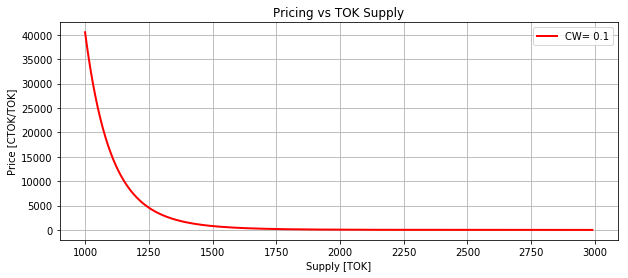


TOK Issued:	 0.00025814178321353014
TOKsupply:	 1000.0
EOSbalance:	 0.002235024295765999
CW:		 0.5
Price:		 0.5830951894845299


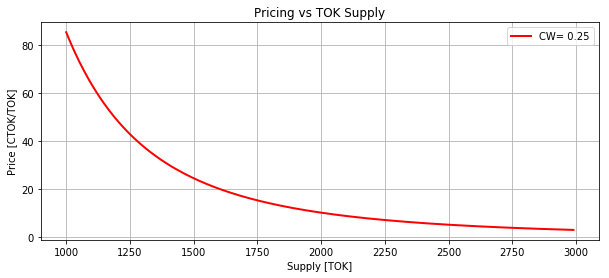


TOK Issued:	 0.11912387170442601
TOKsupply:	 1000.0
EOSbalance:	 2.8444491905120817
CW:		 0.5
Price:		 0.5830951894845299


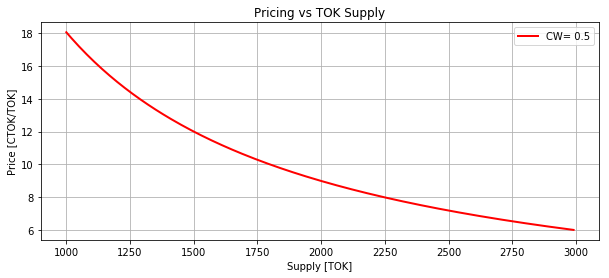


TOK Issued:	 0.5564815694063496
TOKsupply:	 1000.0
EOSbalance:	 27.40740261539256
CW:		 0.5
Price:		 0.5830951894845299


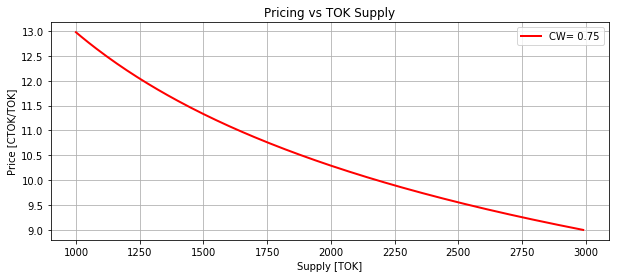


TOK Issued:	 0.7719719554668443
TOKsupply:	 1000.0
EOSbalance:	 57.608776896411584
CW:		 0.5
Price:		 0.5830951894845299


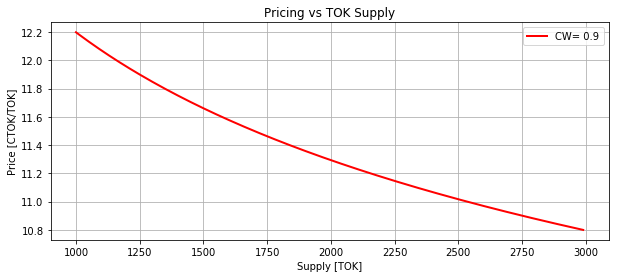


TOK Issued:	 0.8202167795942634
TOKsupply:	 1000.0
EOSbalance:	 73.69661981210366
CW:		 0.5
Price:		 0.5830951894845299


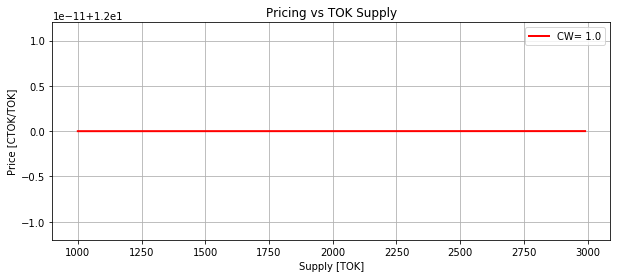


TOK Issued:	 0.8333333333333344
TOKsupply:	 1000.0
EOSbalance:	 83.33333333333337
CW:		 0.5
Price:		 0.5830951894845299


In [4]:
import numpy as np
import matplotlib.pyplot as plt

for CW in [0.1, 0.25, 0.50, 0.75, 0.90,1.0]:
    
    ex = BancorExchange(CW)
    HORUSsupply = 3000.0000
    EOSbalance = 250 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
    
    # horus_supply = np.linspace(1000,2000,1000)
    horus = smart_token("HORUS", HORUSsupply)

    eos = connector("EOS",EOSbalance, CW)


    price = []
    hsupplylist = []
    hsupply = horus.supply
    while (hsupply > 1000):

        TOKrecieved = 10
        #print("tok.supply = ", horus.supply)
        #print("CW = ", ex.CW)
        #print("CTOK.balance ", eos.balance)
        CTOKissued = ex.TOKtoCTOK(tok=horus, ctok=eos, TOKreceived=TOKrecieved)
#         print(CTOKissued)
        hsupply = horus.supply
        hsupplylist.append(horus.supply)
#         price.append(ex.price)
        price.append(1/ex.price) # this flips the units to [Horus/EOS]. Correct?
        

    
    plt.figure(figsize=(10,4))
    plt.plot(hsupplylist, price,'r', linewidth=2,label="CW= "+str(CW))
    plt.title("Pricing vs TOK Supply")
    plt.legend()
    plt.ylabel("Price [CTOK/TOK]")
    plt.xlabel("Supply [TOK]")
#     plt.axis([900,2100,0,4.])
    plt.grid(True)
    plt.show()
    
    print()
    print("TOK Issued:\t",     CTOKissued)
    print("TOKsupply:\t",      horus.supply)
    print("EOSbalance:\t",     eos.balance)
    print("CW:\t\t",           exchange.CW)
    print("Price:\t\t",        exchange.price)
#     print("Effective Price:", exchange.effective_price)
    


## Conclusion
The basics of the bancor algorithm are listed above. These plots don't quite match the Bancor whitepaper exactly so we should see where their algorithm differs from ours. Some of the initial balance values will make the plots differ in their scale, but the share should be similar.

### ToDo: 
* Incorporate the 10 day time lag into the formula 
* Produce some test cases to make sure the algorithm works
* code it up in EOS!


In [5]:
# 

for CW = [0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    

SyntaxError: invalid syntax (<ipython-input-5-233810485bda>, line 3)